# 로지스틱 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
X = iris.data[:, 3:] # 특성 1개만 사용 ('petal width (cm)')
y = (iris.target == 2).astype(np.int32) # Virginca 이면 1, 아니면 0

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y) # 훈련 : 비용함수(로그손실)를 최소화하는 모델파라미터(theta 0, 1)를 찾음

LogisticRegression(random_state=42)

In [9]:
log_reg.intercept_, log_reg.coef_

(array([-7.1947083]), array([[4.3330846]]))

In [11]:
log_reg.predict([[2.5]]) # 야생에서 가져온 샘플의 petal width (2차원 데이터로 넣어주기)

array([1], dtype=int32)

In [12]:
log_reg.predict_proba([[2.5]]) # Virginica일 확률(0.025:Virginica가 아닐 확률, 0.97:Virginica일 확률)

array([[0.02563061, 0.97436939]])

In [13]:
0.02563061 + 0.97436939

1.0

In [15]:
X.shape

(150, 1)

In [17]:
X_new = np.linspace(0, 3, 1000).reshape((-1, 1)) # (1000, 1)
X_new.shape

(1000, 1)

In [19]:
y_prob = log_reg.predict_proba(X_new)

In [22]:
X_new[0], X_new[-1]

(array([0.]), array([3.]))

In [20]:
y_prob[0][0] # 1000개 중 0번째 샘플(petal width 0cm)에 대해 Virginica가 아닐 확률
y_prob[0][1] # 1000개 중 0번째 샘플(petal width 0cm)에 대해 Virginica일 확률

array([9.99250016e-01, 7.49984089e-04])

In [27]:
decision_boundary = X_new[y_prob[:, 1]>0.5][0]

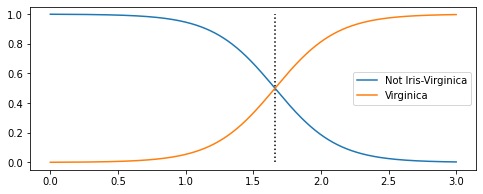

In [29]:
plt.figure(figsize=(8, 3))
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:')
plt.plot(X_new, y_prob[:, 0], label='Not Iris-Virginica') # Virginica가 아닐 확률
plt.plot(X_new, y_prob[:, 1], label='Virginica') # Virginica일 확률
plt.legend()

In [30]:
log_reg.predict([[1.7]])

array([1], dtype=int32)

In [31]:
log_reg.predict([[1.5]])

array([0], dtype=int32)

# 소프트맥스 회귀

In [32]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
X = iris.data[:, 2:] # 특성 2개만 사용 ('petal length (cm)', 'petal width (cm)')
y = iris.target # 3품종(클래스)을 구분하는 문제(다중 분류)

In [39]:
softmax_reg = LogisticRegression(multi_class='multinomial', random_state=42)
softmax_reg.fit(X, y) # 훈련 : 비용함수(로그손실)를 최소화하는 모델파라미터(theta 0, 1)를 찾음

LogisticRegression(multi_class='multinomial', random_state=42)

In [40]:
softmax_reg.intercept_

array([ 11.12767979,   3.22717485, -14.35485463])

In [41]:
softmax_reg.coef_

array([[-2.74866104, -1.16890756],
       [ 0.08356447, -0.90803047],
       [ 2.66509657,  2.07693804]])

In [42]:
# 예측 : 야생에서 채집해온 데이터의 꽃잎의 길이와 너비 -> (5cm, 2cm)
softmax_reg.predict([[5, 2]]) # 2번 class (Setosa로 예측)

array([2])

In [43]:
softmax_reg.predict_proba([[5, 2]])

array([[2.43559894e-04, 2.14859516e-01, 7.84896924e-01]])